# Exercise 7

## Part I Sample Spectrum
- Generate an AR(1) process with $\alpha=0.7$  
- Calculate the sample spectrum according to Eq.3.2.4 $\hat{h}_T(\omega)=\frac{|G_T(\omega)|^2}{2T}$
- Compare this with the FFT of the symmetric autocovariance function
- Plot both seperatly.

## Part II Power spectrum (Amplitude Density Function)
- Calculate the autocovariance of the previous AR(1)
- Create a list with inverse symmetric autocovariance function, thus: $\tau={0,1,\dots,max,max-1,\dots,1}$
- Create also a list where you only take the first 50 values of the autocovariance and fill it up with zeros. Then build the invers symmetric like befor.
- Calculate the fft of both lists and plot them seperatly.

In [2]:
    import numpy as np
    import matplotlib.pyplot as plt

In [7]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [45]:
# WHITE NOISE PARAMS
mu=0
sigma=1
nt=500 #  n of samples
WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
#AR1 params
alpha=0.7
x0=WN_arr[0]

In [5]:
def get_AR1(nt,alpha,x0,WN_arr):
    AR1_arr=np.zeros(nt)
    AR1_arr[0]=x0
    for i in range(1,nt):
        AR1_arr[i]=AR1_arr[i-1]*alpha+WN_arr[i]
        
    return AR1_arr


 Generate an AR(1) process with $\alpha=0.7$

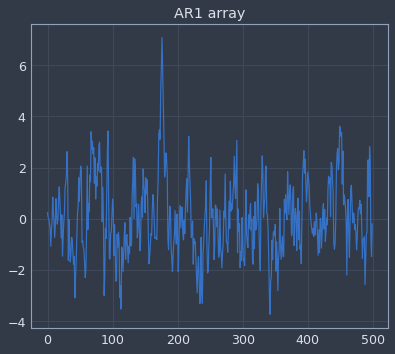

In [46]:
AR1_arr=get_AR1(nt,alpha,x0,WN_arr)
plt.plot(AR1_arr);
plt.title("AR1 array");

- Calculate the sample spectrum according to Eq.3.2.4 $\hat{h}_T(\omega)=\frac{|G_T(\omega)|^2}{2T}$

In [47]:
Xt=AR1_arr
Gt=np.fft.fft(Xt)

/home/igor/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


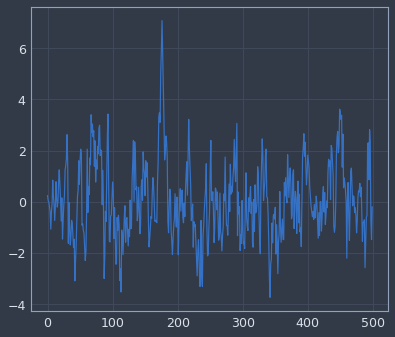

In [48]:
plt.plot(np.fft.ifft(Gt))

In [61]:
ht_hat=((np.abs(Gt))**2)/(2*nt)

Compare this with the FFT of the symmetric autocovariance function

Get symmetric autocovariance function

In [16]:
def autocov(tmin,tmax,xarr):
    N=len(xarr) # length of input array
    xmean=np.mean(xarr)
#     assert abs(tmin)<N | abs(tmax)<N
    
    tauarr = np.arange(tmin,tmax)
    autoarr = np.zeros(len(tauarr))
    for i in range(len(tauarr)):
#     autoarr[i]=autocov(tauarr[i],resid)
        xsum = 0
        tau = tauarr[i]
        for t in range(N-abs(tau)):
            xsum = xsum+(xarr[t] - xmean)*(xarr[t+tau]-xmean)

        curval=xsum/N
        autoarr[i]=curval
    
    return autoarr,tauarr

Text(0.5, 1.0, 'symmeteric acov of Xt - AR1 process')

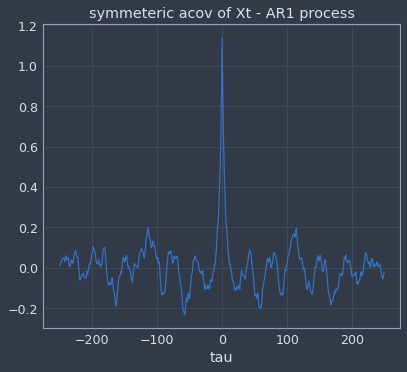

In [72]:
autoarr,tauarr = autocov(-250,250,Xt)
autoarr=autoarr/2
plt.plot(tauarr,autoarr)
plt.xlabel('tau')
plt.title('symmeteric acov of Xt - AR1 process')

Compare ht_hat  with the FFT acov of Xt

In [51]:
len(ht_hat),len(autoarr)

(500, 500)

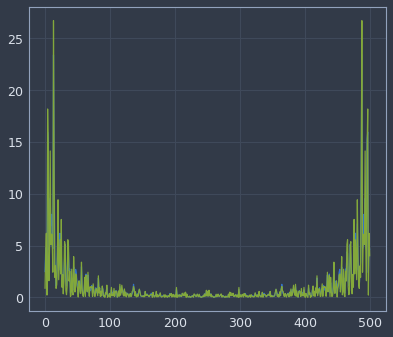

In [64]:
plt.plot(np.abs(np.fft.fft(autoarr)))
plt.plot(ht_hat)

# SECOND PART

## Part II Power spectrum (Amplitude Density Function)
- Calculate the autocovariance of the previous AR(1)
- Create a list with inverse symmetric autocovariance function, thus: $\tau={0,1,\dots,max,max-1,\dots,1}$
- Create also a list where you only take the first 50 values of the autocovariance and fill it up with zeros. Then build the invers symmetric like befor.
- Calculate the fft of both lists and plot them seperatly.

In [80]:
np.stack([autoarr[int(nt/2):],autoarr[:int(nt/2)]]).shape

(2, 250)

In [87]:
acov_inv1=np.append(autoarr[int(nt/2):],autoarr[:int(nt/2)])

In [117]:
acov_inv2=np.append(autoarr[int(nt/2):],autoarr[int(nt/2):][::-1])[:-1]

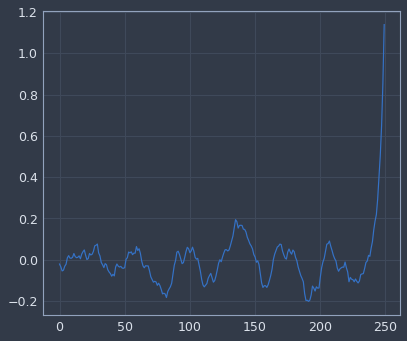

In [84]:
plt.plot(autoarr[int(nt/2):][::-1])

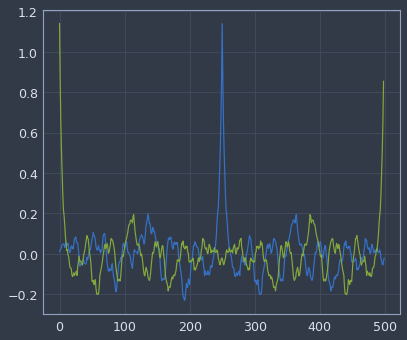

In [118]:
plt.plot(autoarr)
plt.plot(acov_inv2)

Create also a list where you only take the first 50 values of the autocovariance and fill it up with zeros. Then build the invers symmetric like befor.

In [94]:
acov_filled1=np.append(autoarr[:50],np.zeros(len(autoarr)-50))

In [144]:
autoarr,tauarr = autocov(0,250,Xt)

In [160]:
acov_filled2=np.append(autoarr[:50],np.zeros(450))

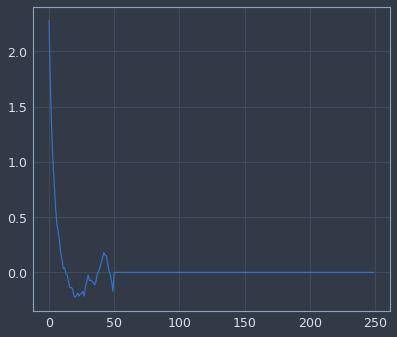

In [167]:
plt.plot(acov_filled2[:250])


In [168]:
acov_filled_inv=np.append(acov_filled2[:250],acov_filled2[:250][::-1])[:-1]

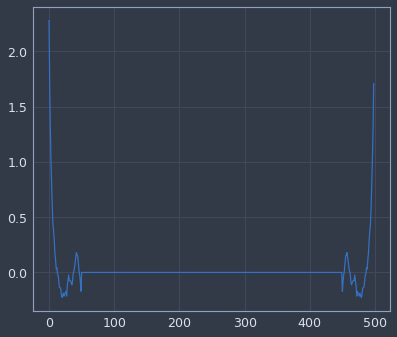

In [169]:
plt.plot(acov_filled_inv)

Calculate the fft of both lists and plot them seperatly.

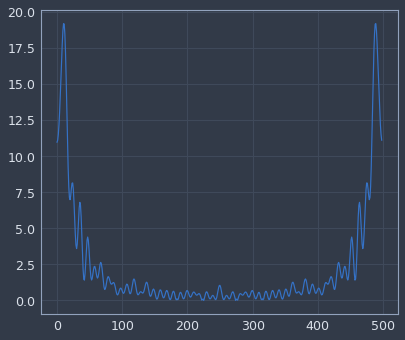

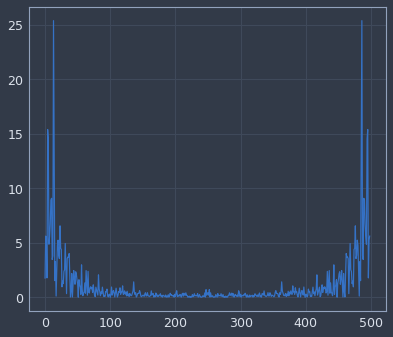

In [174]:
plt.plot(np.abs(np.fft.fft(acov_filled_inv)))
plt.show();
plt.plot(np.abs(np.fft.fft(acov_inv2)))